# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
'''from google.colab import drive
drive.mount('/content/drive')
'''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#!ls drive/'My Drive'/data/train_data.csv

'drive/My Drive/data/train_data.csv'


In [4]:
# Latest version 3.1.1 of matplotlib is breaking the seaborn library hence going back to older version
#pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 90kB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


In [83]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


from collections import Counter

In [2]:
#import plotly.io as pio
#pio.renderers


In [3]:
#pio.renderers.default = 'colab'

## 1.1 Reading Data

In [5]:
project_data = pd.read_csv('/Users/akashsingh/documents/code/ai/aaic/notebooks/assignment3/train_data.csv')
resource_data = pd.read_csv('/Users/akashsingh/documents/code/ai/aaic/notebooks/assignment3/resources.csv')

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
print('The Columns with their nan values counts are below ')
for col in project_data.columns:
    print('{col} '.format(col=col),project_data[col].isnull().sum())

The Columns with their nan values counts are below 
Unnamed: 0  0
id  0
teacher_id  0
teacher_prefix  3
school_state  0
project_submitted_datetime  0
project_grade_category  0
project_subject_categories  0
project_subject_subcategories  0
project_title  0
project_essay_1  0
project_essay_2  0
project_essay_3  105490
project_essay_4  105490
project_resource_summary  0
teacher_number_of_previously_posted_projects  0
project_is_approved  0


In [8]:
# removing 3 nan values from teacher prefix column as they seems to be outliers
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
project_data.dropna(subset=['teacher_prefix'],inplace=True)

In [9]:
#how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   
51140           CA 2016-04-27 00:46:53          Grades PreK-2   
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   
51140        Literacy & Language                                 Literacy   
473             Applied Learning                        Early Development   
41558        Literacy & Language                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1  
51140                                            10                    1  
473                                               2                    1  
41558                                             2                    1

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [11]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = ["__".join(sorted(x.split())) for x in cat_list]
project_data.drop(['project_subject_categories'], axis=1, inplace=True) #0 for index and 1 for columns

#counting the occurence of word

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [12]:
project_data['clean_categories'] = project_data['clean_categories'].map(lambda x : "__".join(sorted(x.split())) if len(x.split()) > 1 else x)


In [13]:
project_data['clean_categories'].unique()

array(['Math_Science', 'SpecialNeeds', 'Literacy_Language',
       'AppliedLearning', 'History_Civics__Math_Science',
       'Literacy_Language__Math_Science', 'AppliedLearning__Music_Arts',
       'AppliedLearning__Math_Science',
       'History_Civics__Literacy_Language',
       'AppliedLearning__Health_Sports', 'Math_Science__Music_Arts',
       'AppliedLearning__Literacy_Language', 'Music_Arts',
       'Health_Sports', 'Literacy_Language__SpecialNeeds',
       'Math_Science__SpecialNeeds', 'AppliedLearning__History_Civics',
       'AppliedLearning__SpecialNeeds',
       'Health_Sports__Literacy_Language',
       'Literacy_Language__Music_Arts', 'Health_Sports__SpecialNeeds',
       'History_Civics__Music_Arts', 'Health_Sports__Math_Science',
       'Music_Arts__SpecialNeeds', 'Health_Sports__History_Civics',
       'History_Civics', 'History_Civics__SpecialNeeds',
       'Health_Sports__Music_Arts', 'Care_Hunger__Health_Sports__Warmth',
       'Care_Hunger__History_Civics__Warmth',

## 1.3 preprocessing of `project_subject_subcategories`

In [14]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = ["__".join(sorted(x.split())) for x in sub_cat_list]
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [15]:
project_data['clean_subcategories'] = project_data['clean_subcategories'].map(lambda x : "__".join(sorted(x.split())) if len(x.split()) > 1 else x)


In [16]:
project_data['clean_subcategories'].value_counts()

Literacy                                   9486
Literacy__Mathematics                      8324
Literature_Writing__Mathematics            5922
Literacy__Literature_Writing               5571
Mathematics                                5379
                                           ... 
Care_Hunger__History_Geography__Warmth        1
Care_Hunger__College_CareerPrep__Warmth       1
Economics__Other                              1
Literature_Writing__NutritionEducation        1
FinancialLiteracy__ForeignLanguages           1
Name: clean_subcategories, Length: 401, dtype: int64

## 1.4 preprocessing of `project grades`

In [17]:
# removing spaces Grades 3-5 into Grades_3-5
project_data['project_grade_category'] = project_data['project_grade_category'].map(lambda word: "_".join(word.split()))

project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades_PreK-2   
76127           UT 2016-04-27 00:31:25             Grades_3-5   
51140           CA 2016-04-27 00:46:53          Grades_PreK-2   
473             GA 2016-04-27 00:53:00          Grades_PreK-2   
41558           WA 2016-04-27 01:05:25             Grades_3-5   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

        clean_categories                  clean_subcategories  
55660       Math_Science  AppliedSciences__Health_LifeScience  
76127       SpecialNeeds                         SpecialNeeds  
51140  Literacy_Language                             Literacy  
473      AppliedLearning                     EarlyDevelopment  
41558  Literacy_Language                             Literacy

## 1.5 Text preprocessing

In [18]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [19]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades_PreK-2   
76127           UT 2016-04-27 00:31:25             Grades_3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                  clean_subcategories  \
55660     Math_Science  AppliedSciences__Health_LifeScience   
76127     SpecialNeeds                         SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [20]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [21]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.\r\nWe all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.\r\n       Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will al

In [23]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.  We all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.         Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will allow 

In [24]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Some of my students come from difficult family lives but they do not let that stop them We have built a community in our classroom that allows each student to be comfortable with who they are Even though we are a diverse school everyone feels included We have a high Hispanic population and about 90 of the students are on free or reduced price lunch Most students are living with a single parent or both parents work full time although many parents are eager to help in any way they can We all know how important it is to get kids up and moving I want my classroom to be a place where students can be active phyically and mentally The requested items will allow my students to move all day When they are sitting in a chair their movement is limited Kindergarten students have a hard time sitting still for long periods of time They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair Having these choices in my classroom will allow students to be active and 

In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [26]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109245/109245 [01:20<00:00, 1349.74it/s]


In [27]:
# after preprocesing
preprocessed_essays[20000]

'students come difficult family lives not let stop built community classroom allows student comfortable even though diverse school everyone feels included high hispanic population 90 students free reduced price lunch students living single parent parents work full time although many parents eager help way know important get kids moving want classroom place students active phyically mentally requested items allow students move day sitting chair movement limited kindergarten students hard time sitting still long periods time would much rather bounce stability ball wiggle cushion sit hard chair choices classroom allow students active learn time choices classroom also build greater bond students learn choose seat best fits learning style hopefully able help classmates find seat works students move around room able work everyone instead one group day nannan'

<h2><font color='red'> 1.6 Preprocessing of `project_title`</font></h2>

In [28]:
# similarly you can preprocess the titles also
preprocessed_title = []

for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r',' ')
    sent = sent.replace('\\"',' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:03<00:00, 29172.83it/s]


<h2><font color='red'> 1.7 Preprocessing of `Teacher Prefix`</font></h2>

In [29]:
# let's check the distribution of this prefix with having period and  special characters
# https://www.geeksforgeeks.org/python-program-check-string-contains-special-character/
import re
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:.]')
project_data.teacher_prefix.map(lambda x: regex.search(x)== None).value_counts()

False    106885
True       2360
Name: teacher_prefix, dtype: int64

In [30]:
# https://stackoverflow.com/questions/50444346/fast-punctuation-removal-with-pandas
# cleaning the teacher prefix columns as the cells have periods associated with the value like dr.,mr.,etc
# python's str.translate function is implemented in C, and is therefore very fast.

def clean_col(col): 
    import string
    punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'   # `|` is not present in teacher prefx
    transtab = str.maketrans(dict.fromkeys(punct, ''))

    col = '|'.join(col.tolist()).translate(transtab).split('|')
    return col

In [31]:
preprocessed_prefix = clean_col(project_data['teacher_prefix'])

In [32]:
# verifying if any special char are present or not
c = list(map(lambda x : regex.search(x) == None,preprocessed_prefix)).count(True)
print(c)

109245


## 1.7 Preparing data for models

In [33]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Assignment 9: RF and GBDT

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

#### Pandas Dataframe Reordering

Reordering the pandas dataframe with pre processed essays,title and relevant columns for classification

In [34]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades_PreK-2   
76127           UT 2016-04-27 00:31:25             Grades_3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                  clean_subcategories  \
55660     Math_Science  AppliedSciences__Health_LifeScience   
76127     SpecialNeeds                         SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [35]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left') 

In [36]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades_PreK-2   
1           UT 2016-04-27 00:31:25             Grades_3-5   
2           CA 2016-04-27 00:46:53          Grades_PreK-2   
3           GA 2016-04-27 00:53:00          Grades_PreK-2   
4           WA 2016-04-27 01:05:25             Grades_3-5   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                  clean_subcategories  \
0       Math_Science  AppliedSciences__Health_LifeScience   
1       SpecialNeeds                         SpecialNeeds   
2  Literacy_Language                             Literacy   
3    AppliedLearning                     EarlyDevelopment   
4  Literacy_Language                             Literacy   

                                               essay   price  quantity  
0  I have been fortunate enough to use the Fairy ...  725.05         4  
1  Imagine being 8-9 years old. You're in your th...  213.03         8  
2  Having a class of 24 students comes with diver...  329.00         1  
3  I recently read an article about giving studen...  481.04         9  
4  My students c

In [37]:
# https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values?rq=1

project_data_ = pd.DataFrame({c: project_data[c].to_numpy() for c in ('school_state','project_grade_category','clean_categories','clean_subcategories',\
                                                                     'teacher_number_of_previously_posted_projects','price','quantity')})
project_data_.head(3)



school_state project_grade_category   clean_categories  \
0           CA          Grades_PreK-2       Math_Science   
1           UT             Grades_3-5       SpecialNeeds   
2           CA          Grades_PreK-2  Literacy_Language   

                   clean_subcategories  \
0  AppliedSciences__Health_LifeScience   
1                         SpecialNeeds   
2                             Literacy   

   teacher_number_of_previously_posted_projects   price  quantity  
0                                            53  725.05         4  
1                                             4  213.03         8  
2                                            10  329.00         1

In [38]:
project_data_ = project_data_.assign(teacher_prefix = preprocessed_prefix,essay = preprocessed_essays,title = preprocessed_title,approved = project_data['project_is_approved'])
project_data_.head(3)


school_state project_grade_category   clean_categories  \
0           CA          Grades_PreK-2       Math_Science   
1           UT             Grades_3-5       SpecialNeeds   
2           CA          Grades_PreK-2  Literacy_Language   

                   clean_subcategories  \
0  AppliedSciences__Health_LifeScience   
1                         SpecialNeeds   
2                             Literacy   

   teacher_number_of_previously_posted_projects   price  quantity  \
0                                            53  725.05         4   
1                                             4  213.03         8   
2                                            10  329.00         1   

  teacher_prefix                                              essay  \
0            Mrs  fortunate enough use fairy tale stem kits clas...   
1             Ms  imagine 8 9 years old third grade classroom se...   
2            Mrs  class 24 students comes diverse learners stude...   

                                     title  approved  
0      engineering steam primary classroom         1  
1                      sensory tools focus         1  
2  mobile learning mobile listening center         1

#### Creating the dataframe for new features first.

In [39]:
# Before splitting model let's check if dataset is balanced or not.
print("Negative reviews count = ",np.sum(project_data_.approved==0))
print("positive reviews count = ",np.sum(project_data_.approved==1))

Negative reviews count =  16542
positive reviews count =  92703


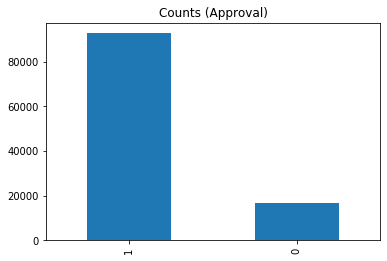

In [40]:
project_data_.approved.value_counts().plot(kind='bar',title='Counts (Approval)')

As we can clearly see that this dataset higly imbalanced towards positive reviews that means most of the posted projects are getting accepted on this platform. But to solve this problem we need to oversample the negative reviews.

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# We will be taking only 50K data points as mentioned above in Assignment 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = None,None,None,None # clearing the variables
# splitting of train and test data with 80:20 ratio

x_train,x_test,y_train,y_test = train_test_split(project_data_.iloc[:,:project_data_.shape[1]-1],project_data_.approved,test_size=.5,random_state=31,stratify=project_data_.approved)
#X_train,X_cv,y_train,y_cv = train_test_split(X_traincv,y_traincv,test_size=.2,stratify=y_traincv)
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=.2,random_state=31,stratify=y_train)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=.2,random_state=31,stratify=y_train)


print("Train Data shape : ",x_train.shape, y_train.shape)
print("Cross Validation Data shape :", x_cv.shape, y_cv.shape)
print("Test Data shape :", x_test.shape, y_test.shape)

print("="*100)


Train Data shape :  (34957, 10) (34957,)
Cross Validation Data shape : (8740, 10) (8740,)
Test Data shape : (10925, 10) (10925,)


In [42]:
# With stratify = class label

print("x train distribution = \n", y_train.value_counts())
print("x cv distribution = \n", y_cv.value_counts())
print("x test distribution = \n", y_test.value_counts())

x train distribution = 
 1    29663
0     5294
Name: approved, dtype: int64
x cv distribution = 
 1    7417
0    1323
Name: approved, dtype: int64
x test distribution = 
 1    9271
0    1654
Name: approved, dtype: int64


In [43]:
x_train.head(3)

school_state project_grade_category          clean_categories  \
53342           NC             Grades_3-5           AppliedLearning   
57203           MI          Grades_PreK-2  Music_Arts__SpecialNeeds   
22964           FL          Grades_PreK-2         Literacy_Language   

            clean_subcategories  teacher_number_of_previously_posted_projects  \
53342                     Other                                             2   
57203  SpecialNeeds__VisualArts                                             7   
22964        Literature_Writing                                             0   

        price  quantity teacher_prefix  \
53342  365.46         1            Mrs   
57203  266.74         8            Mrs   
22964  343.98        15            Mrs   

                                                   essay  \
53342  students third grade come backgrounds makes un...   
57203  school urban area classified low performing sc...   
22964  teach title one school 75 students free reduce...   

                                       title  
53342                      communication key  
57203                       love arts crafts  
22964  primary literacy tools future leaders

## **Functions Declaration:**

Declaration of functions for which is further used in computational process like 
* Vectorization
* Hyperparamater Tuning
* Model Generalisation score on Test Data 
* Printing Dimenionality info of input matrix list
* Retrive the vocabulary words for vectorization purposes
* Data Visualization method
* calculate response probability score method
* encode with response score method

In [44]:
def retreive_vocab(_data=None):
    ls = []
    for word in _data:
        if len(word) != 1:
            for w in word.split():
                ls.append(w)
        else:
            ls.append(word)
    return list(set(ls))

In [45]:
# response coding for categorical variables
# dclaring global variable list of hashed value to store their probabilities
encoded_list = list()
def cal_response_proba(_arr,y,ret_feat='n'):
    """
    It calculate the response probability for each categorical features and save it in global list of dictionary
    _arr = pandas series
    y = pandas series
    """
    dict0={}
    dict1={}
    # create a mask array for y=0 and y=1
    mask_0 = y_train==0
    mask_1 = y_train==1
    # retreive all the unqiue features from the list
    feat_list = list(set(_arr.values))
    for feat in feat_list:
        try:
            p0 = _arr[mask_0].value_counts()[feat]
        except KeyError:
            p0 = 0 # if certain features don't exists then probability will 0 while training
        try:
            p1 = _arr[mask_1].value_counts()[feat]
        except KeyError:
            p1 = 0     
        dict0[feat] = p0 / (p0+p1)
        dict1[feat] = p1 / (p0+p1)

    # updating the global response encoded dictionary
    global encoded_list
    if len(encoded_list)==0:
        encoded_list.append(dict0)
        encoded_list.append(dict1)
    else:
        # https://stackoverflow.com/questions/1551666/how-can-2-python-dictionaries-become-1/1551878#1551878
        encoded_list[0] = dict(encoded_list[0],**dict0)
        encoded_list[1] = dict(encoded_list[1],**dict1)
    if ret_feat == 'y':
        return feat_list
        
    

In [46]:
def encode_response_proba(_arr):
    """
    _arr = pandas series
    y = pandas series
    It transform the categorical variables by using global dictionary in encoded list learned by cal response proba
    """
    global encoded_list
    updated_arr0= list()
    updated_arr1= list()
    for ind,val in enumerate(_arr.values):   
        try:
            updated_arr0.append(encoded_list[0][val])
        except KeyError:
            print("The value {0} is not present in dictionary 0, hence replacing it with 1/2 score".format(val))
            updated_arr0.append(0.5)
        try:
            updated_arr1.append(encoded_list[1][val])
        except KeyError:
            print("The value {0} is not present in dictionary 1, hence replacing it with 1/2 score".format(val))
            updated_arr1.append(0.5)
    updated_arr = np.hstack((np.array(updated_arr0).reshape(-1,1),np.array(updated_arr1).reshape(-1,1)))
    return updated_arr

In [47]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/Users/akashsingh/documents/code/ai/aaic/notebooks/assignment3/glove_vectors.dms', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [48]:
def compute_avg_w2v(_text):
    global model,glove_words
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(_text): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
        
    return avg_w2v_vectors

In [49]:
def compute_tfidf_w2v(tfidf_model,_text):
    global model,glove_words
    # we are converting a dictionary with word as a key, and the idf as a value
    idf_value = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(_text): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = idf_value[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print("The number of rows are: ",len(tfidf_w2v_vectors))
    print("The number of columns are: ",len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [50]:
# Defining a function to compute BOW, TFIDF and Word2Vec 

def vectorize_text(encoding_type=None,**kwargs):
    # Validation for proper argument names
    try:
        checklist = ['test_text','cv_text','train_text']
        for k,v in kwargs.items():
            if k in checklist:
                checklist.remove(k)
        if not checklist:
            # do nothing
            pass
        else:
            raise ValueError("You haven't passed the matrices in the described format, please use names as test_text,cv_text,train_text")
    except ValueError as e:
        print("Error : ", e)
            
    text_train = kwargs['train_text']
    text_cv = kwargs['cv_text']
    text_test = kwargs['test_text']
    
    if "BOW" in encoding_type.upper():
        #Compute BOW
        # We are considering only the words which appeared in at least 10 documents(rows or projects).
        vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
        vectorizer.fit(text_train)
        return vectorizer.transform(text_train),vectorizer.transform(text_cv),vectorizer.transform(text_test),vectorizer.get_feature_names()
    
    elif "TFIDF" in encoding_type.upper() and "W2V" not in encoding_type.upper():
        #Compute TFIDF
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
        vectorizer.fit(text_train)
        return vectorizer.transform(text_train),vectorizer.transform(text_cv),vectorizer.transform(text_test),vectorizer.get_feature_names()
    
    elif "AVGW2V" in encoding_type.upper():
        # compute average word2vec for each review.
        train = np.array(compute_avg_w2v(_text = text_train))
        cv = np.array(compute_avg_w2v(_text = text_cv))
        test = np.array(compute_avg_w2v(_text = text_test))
        return train,cv,test
        
    elif "TFIDFW2V" in encoding_type.upper():
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
        vectorizer.fit(text_train)
        train = np.array(compute_tfidf_w2v(tfidf_model=vectorizer,_text = text_train))
        cv = np.array(compute_tfidf_w2v(tfidf_model = vectorizer,_text = text_cv))
        test = np.array(compute_tfidf_w2v(tfidf_model = vectorizer,_text = text_test))
        return train,cv,test
    
    else:
        raise ValueError('Please give the encoding type from the following: BOW, TFIDF, AVGW2V,TFIDFW2V')
        
        

In [80]:
def viz(AUC_score,x_axis,y_axis,viz_type='plot'):
   
    # X axis or row is sample split and y axis is depth
    if viz_type == 'plot' or viz_type == 'p':
    
        # # https://plot.ly/python/3d-axes/
        trace1 = go.Scatter3d(x=x_axis,y=y_axis,z=AUC_score[:,0], name = 'train')
        trace2 = go.Scatter3d(x=x_axis,y=y_axis,z=AUC_score[:,1], name = 'Cross validation')
        data = [trace1, trace2]

        layout = go.Layout(scene = dict(
            xaxis = dict(title='n_estimators'), 
            yaxis = dict(title='max_depth'), # max depth of tree
            zaxis = dict(title='AUC'),))

        fig = go.Figure(data=data, layout=layout)
        offline.iplot(fig, filename='3d-scatter-colorscale')
        plt.show()

    elif viz_type == 'heatmap' or viz_type == 'h':
        # seaborn heatmap for train
        f, (ax1, ax2 , ax3) = plt.subplots(1, 3,figsize=[30,8])
        df_train = pd.DataFrame(data={'min_sample_split':x_axis,'max_depth':y_axis,'AUC_score_train':AUC_score[:,0]})
        heatmap_data_train = pd.pivot_table(df_train,values='AUC_score_train',index='min_sample_split',columns=['max_depth'])
        akws = {"ha": 'left',"va": 'top'}
        sns.heatmap(data=heatmap_data_train,annot=True,annot_kws=akws,fmt=".2f",ax=ax1)
        ax1.set_title('Train cross validation')
        
        df_cv = pd.DataFrame(data={'min_sample_split':x_axis,'max_depth':y_axis,'AUC_score_cv':AUC_score[:,1]})
        heatmap_data_cv = pd.pivot_table(df_cv,values='AUC_score_cv',index='min_sample_split',columns=['max_depth'])
        akws = {"ha": 'left',"va": 'top'}
        sns.heatmap(data=heatmap_data_cv,annot=True,annot_kws=akws,fmt=".2f",ax=ax2)
        ax2.set_title('CV cross validation')
        
        df_diff = pd.DataFrame(data={'min_sample_split':x_axis,'max_depth':y_axis,'AUC_score_diff':AUC_score[:,0] - AUC_score[:,1]})
        heatmap_data_cv = pd.pivot_table(df_diff,values='AUC_score_diff',index='min_sample_split',columns=['max_depth'])
        akws = {"ha": 'left',"va": 'top'}
        sns.heatmap(data=heatmap_data_cv,annot=True,annot_kws=akws,fmt=".2f",ax=ax3)
        ax3.set_title('Diff in AUC Scores cross validation')
        
        plt.show()
        

In [52]:
def _hypertuning(clf_type,x_train,y_train,x_cv,y_cv):
    """
    clf = classifer need to be trained 
    **params = dictionary of parameters to be consider for training params = {'key':value}
    training and cross validation data points and target class labels
    
    """
    """
    Random Forest Classifier definition -
    
        class sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
        n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
        
    """
    
    # Computing the AUC score
    from sklearn.metrics import roc_auc_score
    
    params = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000],'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
    # Intilize the result param lists
    
    train_auc_score = list()
    cv_auc_score = list()
    cordinates = list()
    # Hyper tuning starts here - 
    # n_estimators : Number of trees in forest
    # max_depth : Depth of each trees
    
    # Random Forest 
    if clf_type.lower() == 'rf':
        for est in params['n_estimators']:
            for depth in params['max_depth']:
                #y_train_pred = list()
                #y_cv_pred = list()
                clf = RandomForestClassifier(n_estimators=est,max_depth=depth,n_jobs=-1,class_weight='balanced')
                clf.fit(x_train,y_train)
                #y_train_pred.extend(clf.predict_proba(x_train)[:,1])
                #y_cv_pred.extend(clf.predict_proba(x_cv)[:,1])
                train_auc_score.append(roc_auc_score(y_true=y_train,y_score=clf.predict_proba(x_train)[:,1]))
                cv_auc_score.append(roc_auc_score(y_true=y_cv,y_score=clf.predict_proba(x_cv)[:,1]))
                cordinates.append((est,depth))
    # XGboost 
    elif clf_type.lower() == 'gbdt':
        for est in params['n_estimators']:
            for depth in params['max_depth']:
                clf = xgb.XGBClassifier(n_estimators=est, max_depth=depth,n_jobs=-1,learning_rate=0.1)
                clf.fit(x_train,y_train)
                #y_train_pred.extend(clf.predict_proba(x_train)[:,1])
                #y_cv_pred.extend(clf.predict_proba(x_cv)[:,1])
                train_auc_score.append(roc_auc_score(y_true=y_train,y_score=clf.predict_proba(x_train)[:,1]))
                cv_auc_score.append(roc_auc_score(y_true=y_cv,y_score=clf.predict_proba(x_cv)[:,1]))
                cordinates.append((est,depth))
    
    return np.c_[np.array(train_auc_score),np.array(cv_auc_score)],cordinates # cordinates tuples (x,y) as (estimators,depth)
    

In [53]:
#https://www.ritchieng.com/machine-learning-evaluate-classification-model/

def evaluate_threshold(clf,x_cv,y_cv,first=0,last=0):
    y_cv_pred = list()
    y_cv_pred.extend(clf.predict_proba(x_cv)[:,1])
    from sklearn.metrics import roc_curve
    if first==0 and last==0:
        initial = np.array(y_cv_pred).min()
        final = np.array(y_cv_pred).max()
    else:
        initial = first
        final = last
    fpr,tpr,thresholds = roc_curve(y_true = y_cv,y_score = y_cv_pred)
     # different probability threshold values at which we will be evaluating our model
    t_val = np.linspace(initial,final,num=20)
    sn,sp =0,0
    ss_score = list()
    for i in t_val:
        sn = tpr[thresholds > i][-1]
        sp = 1 - fpr[thresholds > i][-1]
        ss_score.append((sn,sp,i))
    from prettytable import PrettyTable
    x = PrettyTable()
    x.field_names = ['Sensitivity/Recall (TPR)','Specificity (1-FPR)','Threshold Value']
    for val in ss_score:
        sn,sp,th = val
        x.add_row([sn,sp,th]) 
    print(x)

    plt.figure(figsize=(10,5))
    plt.plot(thresholds,tpr,label='Sensitivity/Recall (TPR)')
    plt.plot(thresholds,1-fpr,label='Specificity (1-FPR)')
    plt.legend()
    plt.xlabel('Thresholds')
    plt.ylabel('Performance rates')
    plt.title('Sensitivity/Specificity vs Thresholds')
    
    plt.show()



In [54]:
# https://stackoverflow.com/questions/19984957/scikit-predict-default-threshold

def model_gen_score(clf,x_train,y_train,x_test,y_test,cutoff_val):
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import confusion_matrix
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    y_train_pred_prob = []
    #y_train_pred = []
    y_test_pred_prob = []
    #y_test_pred = []
    
    y_train_pred_prob.extend(clf.predict_proba(x_train)[:,1])
    y_test_pred_prob.extend(clf.predict_proba(x_test)[:,1])
     
    train_fpr, train_tpr, train_thresholds = roc_curve(y_true=y_train,y_score=y_train_pred_prob)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_true=y_test,y_score=y_test_pred_prob)
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    #plt.scatter(train_fpr, np.exp(train_thresholds))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    #plt.scatter(test_fpr, np.exp(test_thresholds))
    plt.legend()
    plt.xlabel("FPR (1 - Specificity)")
    plt.ylabel("TPR (Sensitivity)")
    plt.title("ROC Curve")
    plt.show()
    

    # Confusion matrix evaluations 
    
    print("="*100)
    y_train_pred = (np.array(y_train_pred_prob) >= cutoff_val).astype(int)
    y_test_pred = (np.array(y_test_pred_prob) >= cutoff_val).astype(int)
    
    # false positive point detection : y_pred = True and y_true = False
    y_test_fp = ((y_test_pred == 1) & (y_test == 0))
    
    f, (ax1, ax2) = plt.subplots(2, 1,figsize=[8,8])
    print("Confusion matrix \n")
    sns.heatmap(data=confusion_matrix(y_train, y_train_pred),annot=True,fmt="",ax=ax1)
    ax1.set_title('Train confusion matrix')
    sns.heatmap(data=confusion_matrix(y_test, y_test_pred),annot=True,fmt="",ax=ax2)
    ax2.set_title('Test confusion matrix')
    plt.show()
    
    return (auc(train_fpr, train_tpr),auc(test_fpr, test_tpr))



In [55]:
def print_dimension_info(_obj,_name):
    data_list= ['Training count : ','Cross Validation count : ','Test count : '] * len(_obj)
    col_num = []
    row_num = list()
    for i in _obj:
        row_num.append(i.shape[0])
        col_num.append(i.shape[1])
    print("The Values for : ", _name)
    print("\nRow Values are : ",list(zip(data_list,row_num)))
    print("\nColumn Values are : ",list(zip(data_list,col_num)))
    print("\nType of matrices: ",[type(x) for x in _obj])
    print("*"*100)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [56]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [57]:
# response coding the teacher prefix categorical variables
# update the global dictionary
cal_response_proba(_arr=x_train['teacher_prefix'],y=y_train)
# transform the x train,x cv,x test
x_train_fp = encode_response_proba(_arr=x_train['teacher_prefix'])
x_cv_fp = encode_response_proba(_arr=x_cv['teacher_prefix'])
x_test_fp = encode_response_proba(_arr=x_test['teacher_prefix'])

In [58]:
x_train_fp.shape

(34957, 2)

In [59]:
# response coding the school state categorical variables
# update the global dictionary
cal_response_proba(_arr=x_train['school_state'],y=y_train)
# transform the x train,x cv,x test
x_train_ss = encode_response_proba(_arr=x_train['school_state'])
x_cv_ss = encode_response_proba(_arr=x_cv['school_state'])
x_test_ss = encode_response_proba(_arr=x_test['school_state'])

In [60]:
x_train['project_grade_category']

53342       Grades_3-5
57203    Grades_PreK-2
22964    Grades_PreK-2
95590      Grades_9-12
15434    Grades_PreK-2
             ...      
13699       Grades_3-5
69186       Grades_3-5
75965       Grades_6-8
71613       Grades_3-5
32652    Grades_PreK-2
Name: project_grade_category, Length: 34957, dtype: object

In [61]:
# response coding the project grade category categorical variables
# update/learn probabilites from the global dictionary
cal_response_proba(_arr=x_train['project_grade_category'].map(str),y=y_train)
# transform the x train,x cv,x test
x_train_pgc = encode_response_proba(_arr=x_train['project_grade_category'])
x_cv_pgc = encode_response_proba(_arr=x_cv['project_grade_category'])
x_test_pgc = encode_response_proba(_arr=x_test['project_grade_category'])

In [62]:
# response coding the project subject category categorical variables
# update/learn probabilites from the global dictionary
cal_response_proba(_arr=x_train['clean_categories'],y=y_train)
# transform the x train,x cv,x test
x_train_cat = encode_response_proba(_arr=x_train['clean_categories'])
x_cv_cat = encode_response_proba(_arr=x_cv['clean_categories'])
x_test_cat = encode_response_proba(_arr=x_test['clean_categories'])

In [63]:
# response coding the project subject category categorical variables
# update/learn probabilites from the global dictionary
cal_response_proba(_arr=x_train['clean_subcategories'],y=y_train)
# transform the x train,x cv,x test
x_train_sub = encode_response_proba(_arr=x_train['clean_subcategories'])
x_cv_sub = encode_response_proba(_arr=x_cv['clean_subcategories'])
x_test_sub = encode_response_proba(_arr=x_test['clean_subcategories'])

The value Music__SocialSciences is not present in dictionary 0, hence replacing it with 1/2 score
The value Music__SocialSciences is not present in dictionary 1, hence replacing it with 1/2 score
The value ForeignLanguages__Music is not present in dictionary 0, hence replacing it with 1/2 score
The value ForeignLanguages__Music is not present in dictionary 1, hence replacing it with 1/2 score
The value ESL__Extracurricular is not present in dictionary 0, hence replacing it with 1/2 score
The value ESL__Extracurricular is not present in dictionary 1, hence replacing it with 1/2 score
The value ForeignLanguages__Music is not present in dictionary 0, hence replacing it with 1/2 score
The value ForeignLanguages__Music is not present in dictionary 1, hence replacing it with 1/2 score
The value CommunityService__Health_LifeScience is not present in dictionary 0, hence replacing it with 1/2 score
The value CommunityService__Health_LifeScience is not present in dictionary 1, hence replacing it

In [64]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_train_price_std = price_scalar.transform(x_train['price'].values.reshape(-1, 1))
x_cv_price_std = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))
x_test_price_std = price_scalar.transform(x_test['price'].values.reshape(-1, 1))

Mean : 295.3932302543125, Standard deviation : 354.82502947987075


In [65]:
# we will be doing the standardization of teacher_number_of_previously_posted_projects also.
teacher_pp_count = StandardScaler()
teacher_pp_count.fit(x_train.teacher_number_of_previously_posted_projects.values.reshape(-1,1))
print(f"Mean : {teacher_pp_count.mean_[0]}, Standard deviation : {np.sqrt(teacher_pp_count.var_[0])}")

x_train_pp_count_std = teacher_pp_count.transform(x_train.teacher_number_of_previously_posted_projects.values.reshape(-1,1))
x_cv_pp_count_std = teacher_pp_count.transform(x_cv.teacher_number_of_previously_posted_projects.values.reshape(-1,1))
x_test_pp_count_std = teacher_pp_count.transform(x_test.teacher_number_of_previously_posted_projects.values.reshape(-1,1))



Mean : 11.039791744142804, Standard deviation : 27.527835400202353


In [66]:
# we will be doing the standardization of teacher_number_of_previously_posted_projects also.
quantity_count = StandardScaler()
quantity_count.fit(x_train.quantity.values.reshape(-1,1))
print(f"Mean : {quantity_count.mean_[0]}, Standard deviation : {np.sqrt(quantity_count.var_[0])}")

x_train_q_count_std = quantity_count.transform(x_train.quantity.values.reshape(-1,1))
x_cv_q_count_std = quantity_count.transform(x_cv.quantity.values.reshape(-1,1))
x_test_q_count_std = quantity_count.transform(x_test.quantity.values.reshape(-1,1))



Mean : 16.74577337872243, Standard deviation : 25.0962740978937


In [67]:
print_dimension_info(_obj=[x_train_fp,x_cv_fp,x_test_fp],_name='Teacher Prefix')
print_dimension_info(_obj=[x_train_ss,x_cv_ss,x_test_ss],_name='Schol State Column')
print_dimension_info(_obj=[x_train_pgc,x_cv_pgc,x_test_pgc],_name = 'Project Grade Category')
print_dimension_info(_obj=[x_train_cat,x_cv_cat,x_test_cat],_name= 'Project subject category')
print_dimension_info(_obj=[x_train_sub,x_cv_sub,x_test_sub],_name= 'Project subject sub category')
print_dimension_info(_obj=[x_train_price_std,x_cv_price_std,x_test_price_std],_name = 'Price')
print_dimension_info(_obj=[x_train_pp_count_std,x_cv_pp_count_std,x_test_pp_count_std],_name='Count of previous project submitted by teacher')
print_dimension_info(_obj=[x_train_q_count_std,x_cv_q_count_std,x_test_q_count_std],_name='Quantity Count of resources')

The Values for :  Teacher Prefix

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 2), ('Cross Validation count : ', 2), ('Test count : ', 2)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************
The Values for :  Schol State Column

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 2), ('Cross Validation count : ', 2), ('Test count : ', 2)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************
The Values for :  Project Grade Category

Row Values are :  [('Training count : ', 34957), ('Cross V

In [68]:

x_train_vec = np.hstack((x_train_fp, x_train_ss, x_train_pgc, x_train_cat, x_train_sub, x_train_price_std, x_train_pp_count_std,x_train_q_count_std))
x_cv_vec = np.hstack((x_cv_fp, x_cv_ss, x_cv_pgc, x_cv_cat, x_cv_sub, x_cv_price_std, x_cv_pp_count_std,x_cv_q_count_std))
x_test_vec = np.hstack((x_test_fp, x_test_ss, x_test_pgc, x_test_cat, x_test_sub, x_test_price_std, x_test_pp_count_std,x_test_q_count_std))

print_dimension_info(_obj=[x_train_vec,x_cv_vec,x_test_vec],_name='Stacked sparse matrices dimensions')

# hstack only works with matrices. so can't stack text and matrices

The Values for :  Stacked sparse matrices dimensions

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 13), ('Cross Validation count : ', 13), ('Test count : ', 13)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [69]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [70]:
x_train.columns

Index(['school_state', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'teacher_number_of_previously_posted_projects',
       'price', 'quantity', 'teacher_prefix', 'essay', 'title'],
      dtype='object')

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [71]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code. 

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [72]:
# vectorizing the text data with count vectorizer bi gram model
# Bag of words vectorization for train,cv and test data
bow_title_train,bow_title_cv,bow_title_test,bow_title_features = vectorize_text(encoding_type='BOW',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )

print_dimension_info(_obj=[bow_title_train,bow_title_cv,bow_title_test],_name='Dimensions after BOW on Title :')

bow_essay_train,bow_essay_cv,bow_essay_test,bow_essay_features = vectorize_text(encoding_type='BOW',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )
print_dimension_info(_obj=[bow_essay_train,bow_essay_cv,bow_essay_test],_name='Dimensions after BOW on essay')


The Values for :  Dimensions after BOW on Title :

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 799), ('Cross Validation count : ', 799), ('Test count : ', 799)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values for :  Dimensions after BOW on essay

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 5000), ('Cross Validation count : ', 5000), ('Test count : ', 5000)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
**************************************************************************

In [73]:
# Stacking all the BOW models with existing data frame - 
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
final_x_train = hstack((x_train_vec,bow_title_train,bow_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,bow_title_cv,bow_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,bow_title_test,bow_essay_test),format='csr')

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after BOW')

The Values for :  The Final Matrix dimension info after BOW

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 5812), ('Cross Validation count : ', 5812), ('Test count : ', 5812)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [74]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='rf',x_train = final_x_train,y_train=y_train.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv.values)


In [81]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]

viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

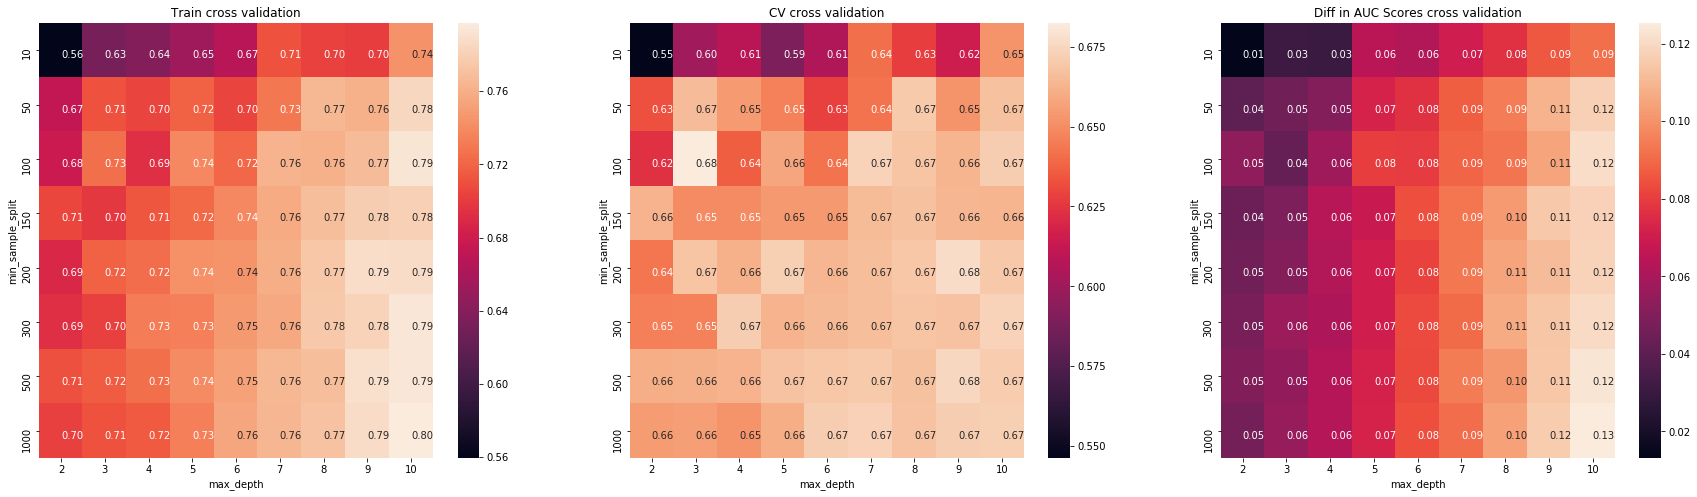

In [76]:
# Extracting the cordinates for visualization and calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

Anyway We can see the minimum difference is 0.02 but model is approx random there. Also, 0.06 seems to be more relevant however the model is still slighly overfitting which need to be taken care of putting more data.

+--------------------------+-----------------------+---------------------+
| Sensitivity/Recall (TPR) |  Specificity (1-FPR)  |   Threshold Value   |
+--------------------------+-----------------------+---------------------+
|           1.0            | 0.0007558578987150177 | 0.45972437798297056 |
|    0.9991910475933666    | 0.0022675736961451642 |  0.4656751923136495 |
|    0.9979776189834165    | 0.0045351473922902175 |  0.4716260066443284 |
|    0.9913711743292436    |   0.0226757369614512  | 0.47757682097500737 |
|    0.9557772684373737    |  0.11035525321239603  | 0.48352763530568627 |
|    0.8849939328569503    |  0.25094482237339377  |  0.4894784496363652 |
|    0.7726843737360118    |   0.4142101284958428  |  0.4954292639670441 |
|    0.6263988135364703    |   0.5956160241874527  |  0.5013800782977231 |
|    0.440339760010786     |   0.7785336356764928  |  0.507330892628402  |
|   0.24996629364972361    |   0.8972033257747544  |  0.5132817069590809 |
|   0.11608467035189429  

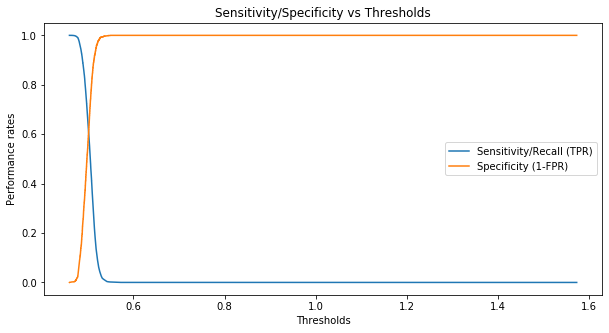

In [84]:
# Evaluate cutoff threshold for confusion matrix
bow_rf_est = 100
bow_rf_depth = 3
rf_clf = RandomForestClassifier(n_estimators=bow_rf_est,max_depth=bow_rf_depth,n_jobs=8,class_weight='balanced')
rf_clf.fit(final_x_train,y_train.values)
evaluate_threshold(clf=rf_clf,x_cv=final_x_cv,y_cv=y_cv.values)

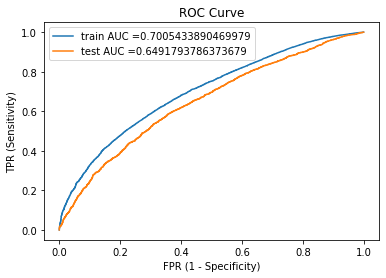

Confusion matrix 



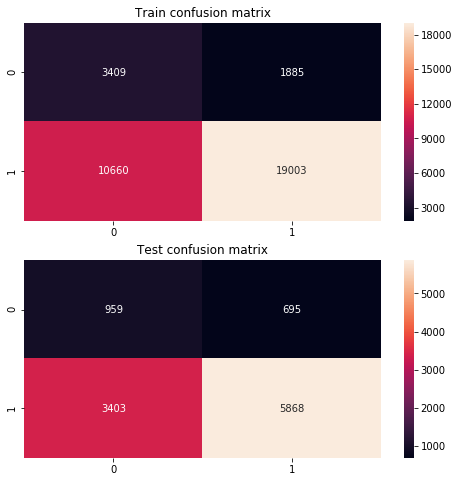

In [85]:
# Checking for model generalization 
bow_train_auc_rf,bow_test_auc_rf = model_gen_score(clf=rf_clf,x_train=final_x_train,y_train=y_train.values,x_test=final_x_test,\
                                           y_test=y_test.values,cutoff_val=0.501)


### 2.4.2 Applying RF brute force on TFIDF,<font color='red'> SET 2</font>

In [86]:
# Please write all the code with proper documentation

tfidf_essay_train,tfidf_essay_cv,tfidf_essay_test,tfidf_features_essay = vectorize_text(encoding_type='TFIDF',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )

In [87]:
# Please write all the code with proper documentation

tfidf_title_train,tfidf_title_cv,tfidf_title_test,tfidf_features_title = vectorize_text(encoding_type='TFIDF',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )

In [88]:
tfidf_essay_train.shape

(34957, 5000)

In [89]:
final_x_train = hstack((x_train_vec,tfidf_title_train,tfidf_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,tfidf_title_cv,tfidf_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,tfidf_title_test,tfidf_essay_test),format='csr')

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after TFIDF')

The Values for :  The Final Matrix dimension info after TFIDF

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 5812), ('Cross Validation count : ', 5812), ('Test count : ', 5812)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [90]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='rf',x_train = final_x_train,y_train=y_train.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv.values)

In [91]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

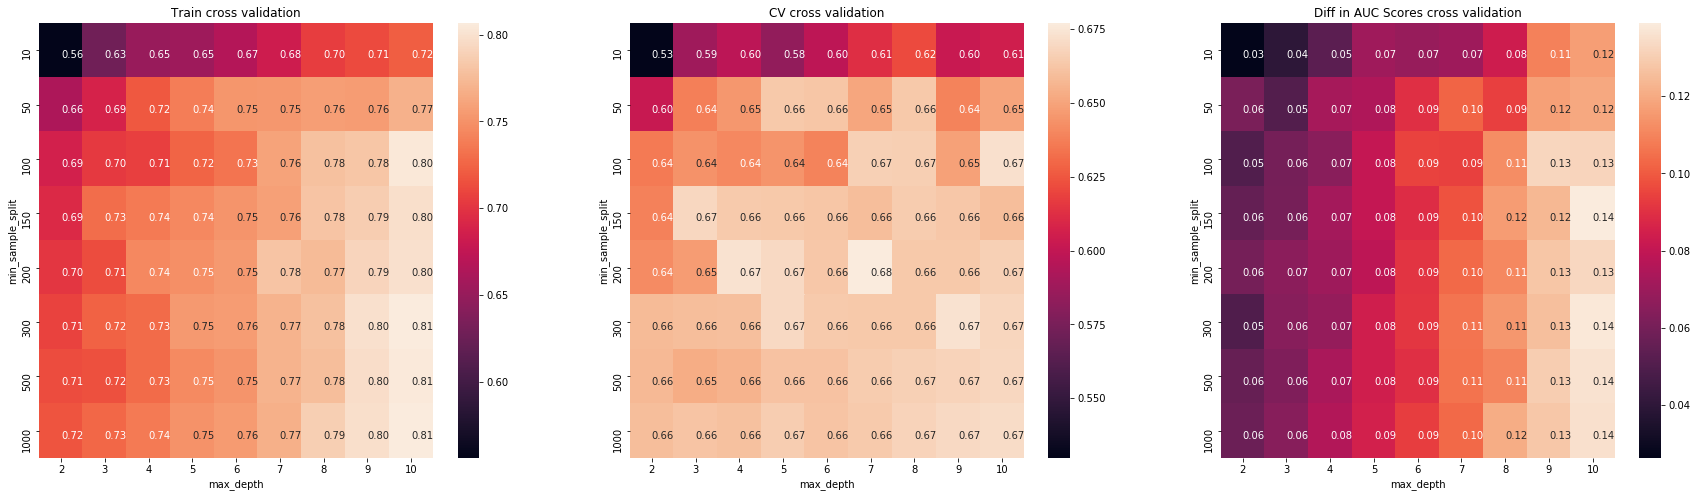

In [92]:
# calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+----------------------+---------------------+
| Sensitivity/Recall (TPR) | Specificity (1-FPR)  |   Threshold Value   |
+--------------------------+----------------------+---------------------+
|    0.9995955237966833    |         0.0          |  0.4709367265567851 |
|    0.9970338411756775    | 0.006802721088435382 |  0.4766143116752272 |
|    0.9755966023998921    | 0.05668934240362811  | 0.48229189679366935 |
|    0.9187002831333423    | 0.19501133786848068  | 0.48796948191211154 |
|    0.8150195496831603    | 0.34467120181405897  | 0.49364706703055367 |
|    0.6733180531212081    |  0.5321239606953893  |  0.4993246521489958 |
|   0.47930430093029525    |  0.7301587301587302  |  0.5050022372674379 |
|   0.26897667520560875    |  0.8828420256991686  |  0.5106798223858801 |
|   0.12336524201159499    |  0.9486016628873771  |  0.5163574075043222 |
|   0.05716597006876095    |  0.981103552532124   |  0.5220349926227643 |
|   0.007415397060806256   |  0.996976

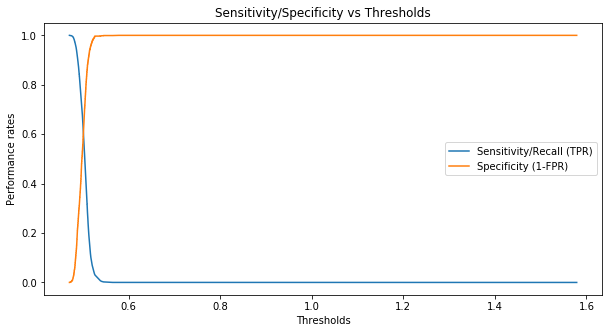

In [93]:
# Evaluate cutoff threshold for confusion matrix
tfidf_rf_est = 150
tfidf_rf_depth = 3
rf_clf = RandomForestClassifier(n_estimators=tfidf_rf_est,max_depth=tfidf_rf_depth,n_jobs=8,class_weight='balanced')
rf_clf.fit(final_x_train,y_train.values)
evaluate_threshold(clf=rf_clf,x_cv=final_x_cv,y_cv=y_cv.values)

Now by looking at the table above we can go for the value which maximizes both sensitivity and specificity but we want our model to be lenient towards false neagtive as we don't want our model wrongly classify the neagtive class as it will impact the existing success rate for donor's choose platform as well as it can hurt the sentiments of projects submitter. So Less False neagtive rate FNR = (FN / FN + TP) means high TP means high Recall. So let's take 0.45 as a threshold value here 

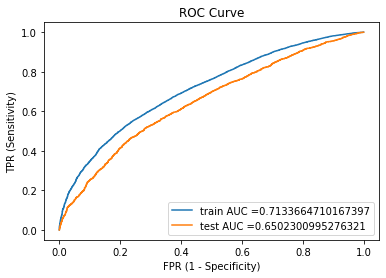

Confusion matrix 



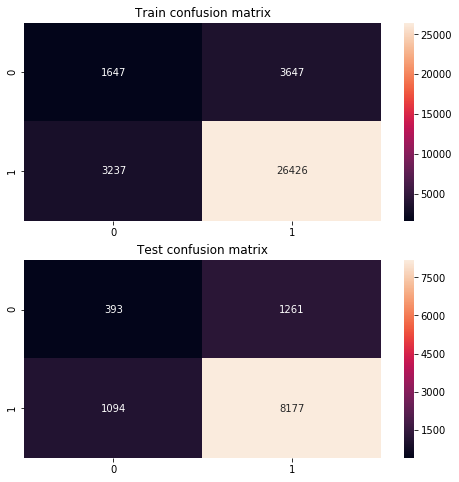

In [94]:
# Checking for model generalization 
tfidf_train_auc_rf,tfidf_test_auc_rf = model_gen_score(clf=rf_clf,x_train=final_x_train,y_train=y_train.values,x_test=final_x_test,\
                y_test=y_test.values,cutoff_val=0.49)



### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [95]:

avgw2v_title_train,avgw2v_title_cv,avgw2v_title_test = vectorize_text(encoding_type='AVGW2V',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )
avgw2v_essay_train,avgw2v_essay_cv,avgw2v_essay_test = vectorize_text(encoding_type='AVGW2V',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )


 52%|█████▏    | 4519/8740 [00:00<00:00, 45181.43it/s]

34957
300


 26%|██▌       | 2786/10925 [00:00<00:00, 27859.16it/s]

8740
300


  1%|▏         | 489/34957 [00:00<00:14, 2313.85it/s]

10925
300


  3%|▎         | 257/8740 [00:00<00:03, 2567.38it/s]

34957
300


  2%|▏         | 264/10925 [00:00<00:04, 2633.71it/s]

8740
300


100%|██████████| 10925/10925 [00:04<00:00, 2596.44it/s]

10925
300


In [96]:
print_dimension_info(_obj=[avgw2v_title_train,avgw2v_title_cv,avgw2v_title_test,avgw2v_essay_train,avgw2v_essay_cv,avgw2v_essay_test],_name='Average W2V dim')



The Values for :  Average W2V dim

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925), ('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 300), ('Cross Validation count : ', 300), ('Test count : ', 300), ('Training count : ', 300), ('Cross Validation count : ', 300), ('Test count : ', 300)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [97]:
# This time we have np.hstack because we are not dealing with the sparse matrices.

final_x_train = np.hstack((x_train_vec,avgw2v_title_train,avgw2v_essay_train))
final_x_cv = np.hstack((x_cv_vec,avgw2v_title_cv,avgw2v_essay_cv))
final_x_test = np.hstack((x_test_vec,avgw2v_title_test,avgw2v_essay_test))
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final matrix of AVGW2V')

The Values for :  The final matrix of AVGW2V

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 613), ('Cross Validation count : ', 613), ('Test count : ', 613)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [98]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='rf',x_train = final_x_train,y_train=y_train.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv.values)


In [99]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

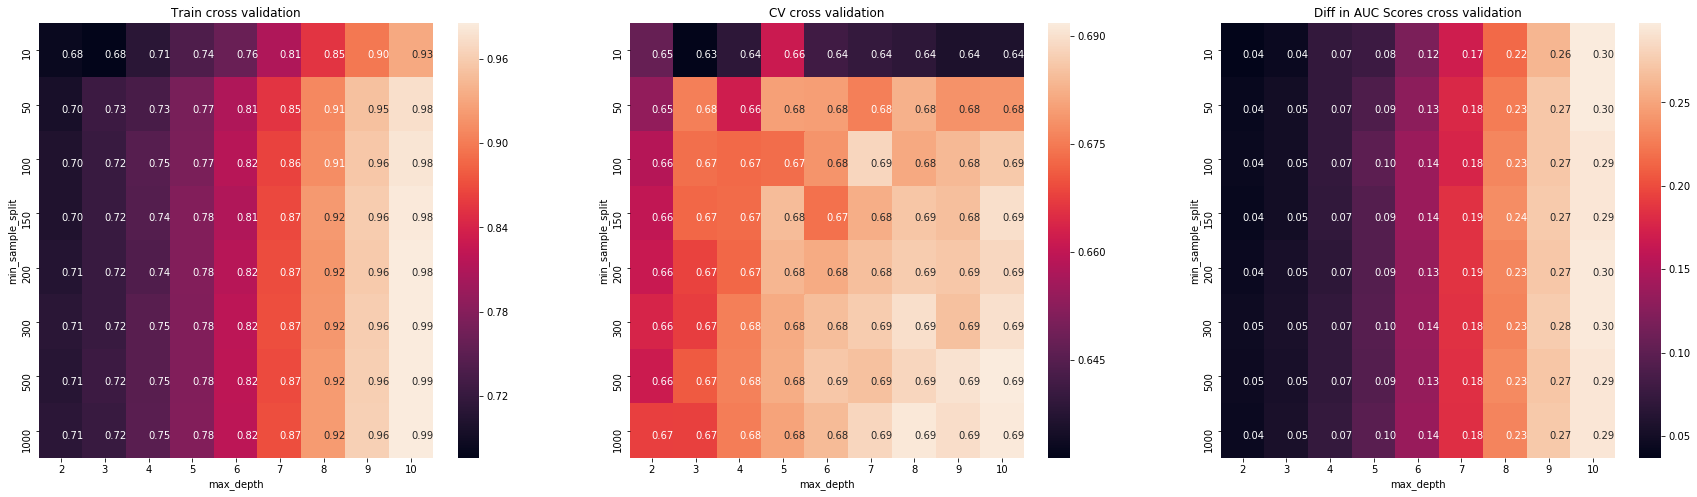

In [100]:
# calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+-----------------------+---------------------+
| Sensitivity/Recall (TPR) |  Specificity (1-FPR)  |   Threshold Value   |
+--------------------------+-----------------------+---------------------+
|    0.9994606983955777    |          0.0          |  0.3735547032827701 |
|    0.9994606983955777    |          0.0          | 0.38763124198581983 |
|    0.9993258729944722    | 0.0015117157974300355 | 0.40170778068886953 |
|    0.9974383173789942    |  0.016628873771730945 |  0.4157843193919193 |
|    0.9890791425104489    |  0.04686318972033254  |  0.429860858094969  |
|    0.972225967372253     |  0.10808767951625098  | 0.44393739679801875 |
|    0.9401375219091277    |  0.20408163265306123  | 0.45801393550106845 |
|    0.8769044087906162    |   0.3159486016628874  |  0.4720904742041182 |
|    0.7889982472697856    |  0.45351473922902497  |  0.4861670129071679 |
|    0.6687339894836187    |   0.5691609977324263  |  0.5002435516102177 |
|    0.5376836996090063  

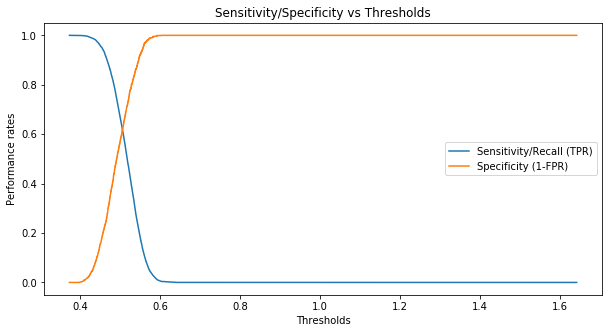

In [101]:
# Evaluate cutoff threshold for confusion matrix
avgw2v_rf_est = 50
avgw2v_rf_depth = 3
rf_clf = RandomForestClassifier(n_estimators=avgw2v_rf_est,max_depth=avgw2v_rf_depth,n_jobs=8,class_weight='balanced')
rf_clf.fit(final_x_train,y_train.values)
evaluate_threshold(clf=rf_clf,x_cv=final_x_cv,y_cv=y_cv.values)

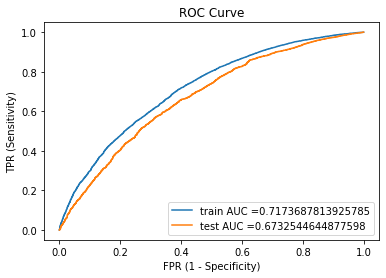

Confusion matrix 



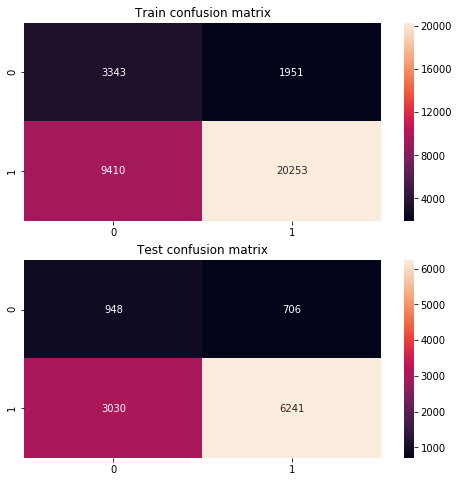

In [102]:
# model generalization score
# Checking for model generalization 
avgw2v_train_auc_rf,avgw2v_test_auc_rf = model_gen_score(clf=rf_clf,x_train=final_x_train,y_train=y_train.values,x_test=final_x_test,\
                y_test=y_test.values,cutoff_val=0.500)



### 2.4.4 Applying RF brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [103]:
# Please write all the code with proper documentation

In [104]:

tfidfw2v_title_train,tfidfw2v_title_cv,tfidfw2v_title_test = vectorize_text(encoding_type='TFIDFW2V',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )
tfidfw2v_essay_train,tfidfw2v_essay_cv,tfidfw2v_essay_test = vectorize_text(encoding_type='TFIDFW2V',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )

  0%|          | 0/10925 [00:00<?, ?it/s]

The number of rows are:  34957
The number of columns are:  300
The number of rows are:  8740
The number of columns are:  300


100%|██████████| 10925/10925 [00:00<00:00, 139262.85it/s]


The number of rows are:  10925
The number of columns are:  300


 55%|█████▍    | 4776/8740 [00:00<00:00, 24477.67it/s]

The number of rows are:  34957
The number of columns are:  300


 20%|█▉        | 2180/10925 [00:00<00:00, 21785.69it/s]

The number of rows are:  8740
The number of columns are:  300


100%|██████████| 10925/10925 [00:00<00:00, 23509.74it/s]


The number of rows are:  10925
The number of columns are:  300


In [105]:
print_dimension_info(_obj=[tfidfw2v_title_train,tfidfw2v_title_cv,tfidfw2v_title_test,tfidfw2v_essay_train,tfidfw2v_essay_cv,tfidfw2v_essay_test],\
                    _name='TFIDF W2V Dimensions')

The Values for :  TFIDF W2V Dimensions

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925), ('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 300), ('Cross Validation count : ', 300), ('Test count : ', 300), ('Training count : ', 300), ('Cross Validation count : ', 300), ('Test count : ', 300)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [106]:
# This time we have np.hstack because we are not dealing with the sparse matrices.

final_x_train = np.hstack((x_train_vec,tfidfw2v_title_train,tfidfw2v_essay_train))
final_x_cv = np.hstack((x_cv_vec,tfidfw2v_title_cv,tfidfw2v_essay_cv))
final_x_test = np.hstack((x_test_vec,tfidfw2v_title_test,tfidfw2v_essay_test))
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final matrix of AVGW2V')

The Values for :  The final matrix of AVGW2V

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 613), ('Cross Validation count : ', 613), ('Test count : ', 613)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [107]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='rf',x_train = final_x_train,y_train=y_train.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv.values)


In [108]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

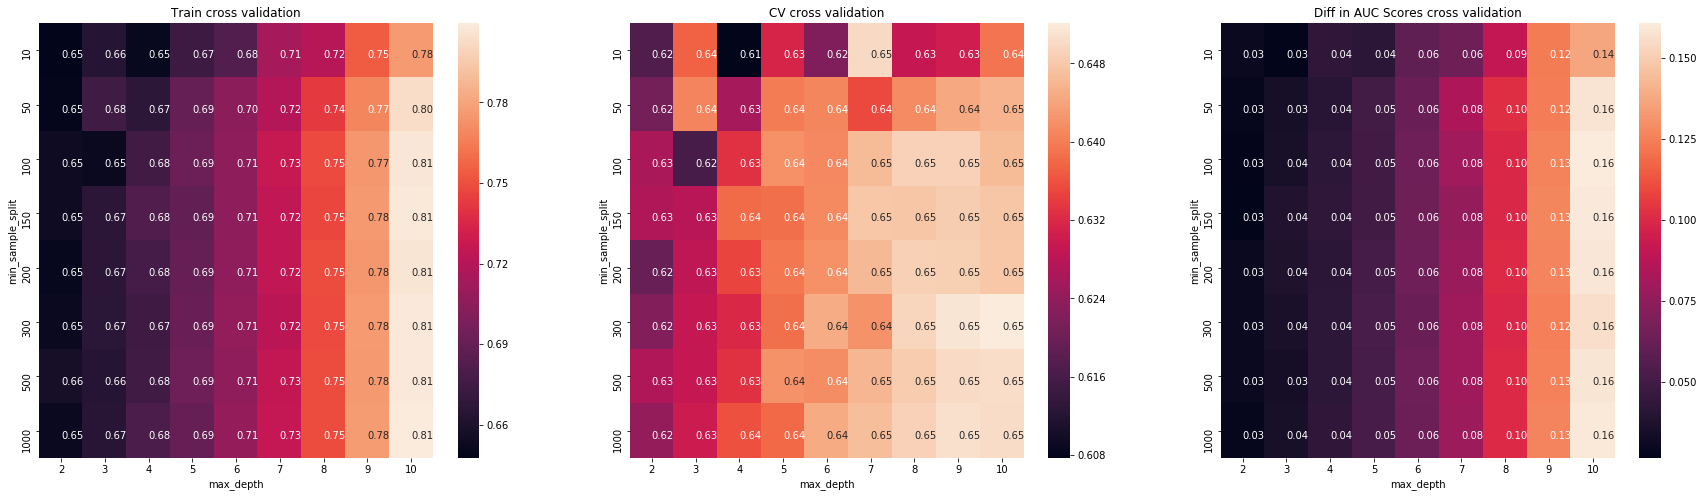

In [109]:
# calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+-----------------------+---------------------+
| Sensitivity/Recall (TPR) |  Specificity (1-FPR)  |   Threshold Value   |
+--------------------------+-----------------------+---------------------+
|    0.9998651745988945    |          0.0          | 0.35282208345049054 |
|    0.9998651745988945    | 0.0007558578987150177 | 0.36774294413036995 |
|    0.9995955237966833    | 0.0015117157974300355 | 0.38266380481024936 |
|    0.9975731427800998    |  0.005291005291005346 |  0.3975846654901288 |
|    0.9932587299447215    |  0.017384731670445963 |  0.4125055261700082 |
|    0.974383173789942     |  0.05668934240362811  |  0.4274263868498876 |
|    0.9374410138870163    |  0.13681027966742254  | 0.44234724752976706 |
|    0.8829715518403667    |  0.23885109599395316  |  0.4572681082096465 |
|    0.8237832007550222    |   0.3189720332577476  |  0.4721889688895259 |
|    0.7202372927059458    |   0.4436885865457294  |  0.4871098295694053 |
|    0.6079277335850074  

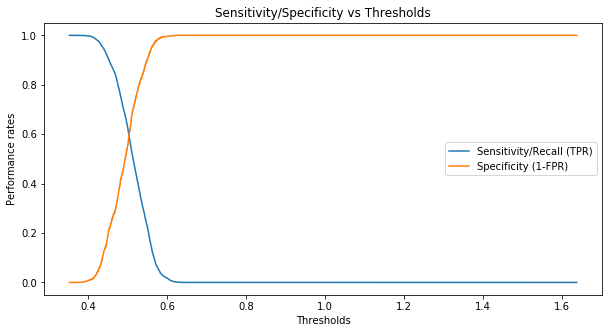

In [110]:
# Evaluate cutoff threshold for confusion matrix
tfidfw2v_rf_est = 50
tfidfw2v_rf_depth = 3
rf_clf = RandomForestClassifier(n_estimators=tfidfw2v_rf_est,max_depth=tfidfw2v_rf_depth,n_jobs=8,class_weight='balanced')
rf_clf.fit(final_x_train,y_train.values)
evaluate_threshold(clf=rf_clf,x_cv=final_x_cv,y_cv=y_cv.values)


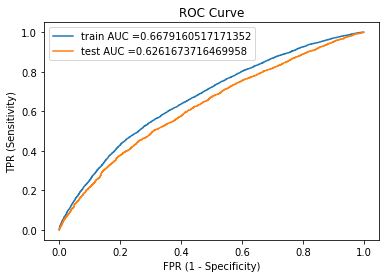

Confusion matrix 



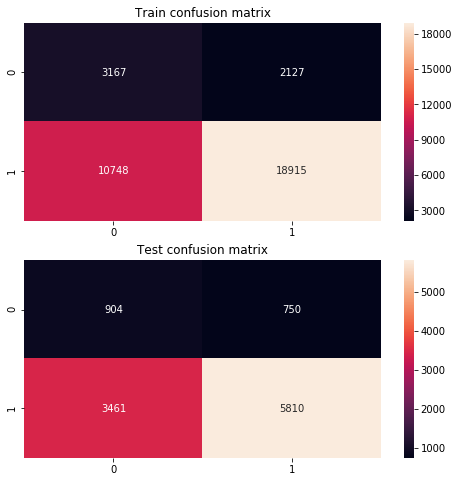

In [111]:
# model generalization score
# Checking for model generalization 
tfidfw2v_train_auc_rf,tfidfw2v_test_auc_rf = model_gen_score(clf=rf_clf,x_train=final_x_train,y_train=y_train.values,x_test=final_x_test,\
                y_test=y_test.values,cutoff_val=0.50)



<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [152]:
# Stacking all the BOW models with existing data frame - 
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
final_x_train = hstack((x_train_vec,bow_title_train,bow_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,bow_title_cv,bow_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,bow_title_test,bow_essay_test),format='csr')

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after BOW')

The Values for :  The Final Matrix dimension info after BOW

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 5812), ('Cross Validation count : ', 5812), ('Test count : ', 5812)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [113]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='gbdt',x_train = final_x_train,y_train=y_train.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv.values)


In [114]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

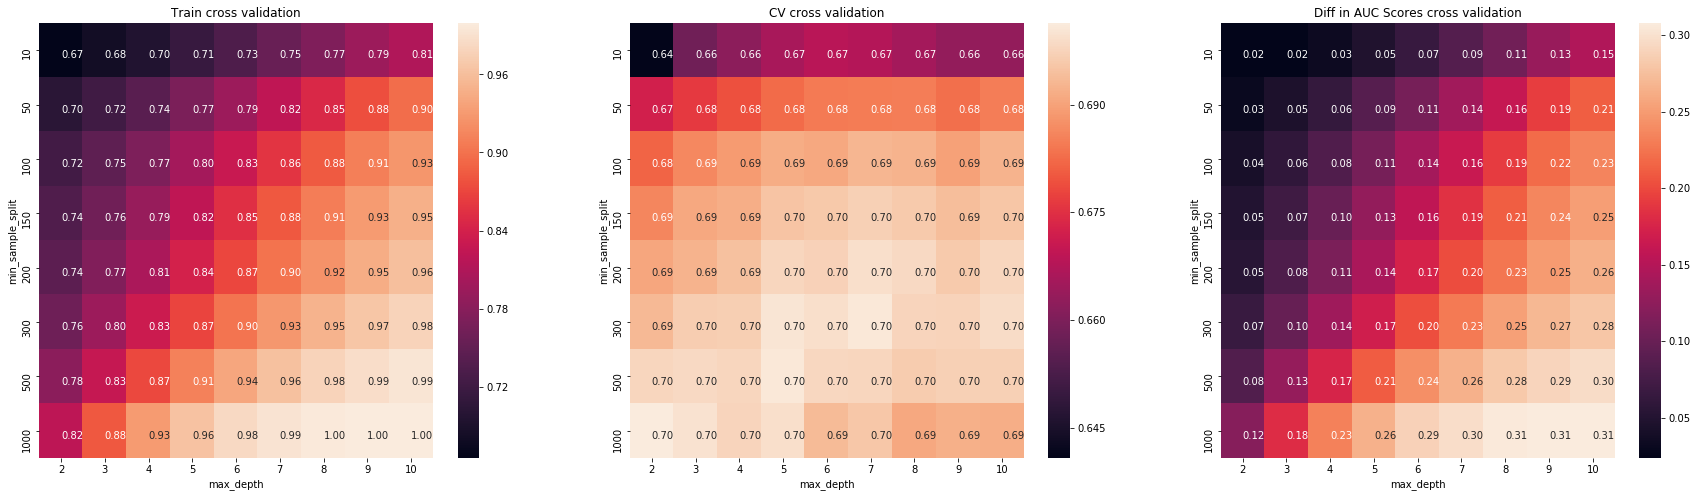

In [115]:
# Extracting the cordinates for visualization and calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+-----------------------+--------------------+
| Sensitivity/Recall (TPR) |  Specificity (1-FPR)  |  Threshold Value   |
+--------------------------+-----------------------+--------------------+
|    0.9998651745988945    |          0.0          | 0.495661199092865  |
|    0.9998651745988945    | 0.0022675736961451642 | 0.521092835225557  |
|    0.999056222192261     |  0.003023431594860182 | 0.5465244713582491 |
|    0.9987865713900499    |  0.006802721088435382 | 0.5719561074909411 |
|    0.9964945395712552    |  0.009070294784580546 | 0.5973877436236331 |
|    0.9936632061480383    |  0.016628873771730945 | 0.6228193797563252 |
|    0.9878657139004988    |  0.034769463340891926 | 0.6482510158890172 |
|    0.9792368882297425    |  0.05517762660619807  | 0.6736826520217092 |
|    0.9626533638937576    |  0.10355253212396065  | 0.6991142881544012 |
|    0.9386544424969664    |  0.15570672713529854  | 0.7245459242870933 |
|    0.9092625050559525    |  0.223733

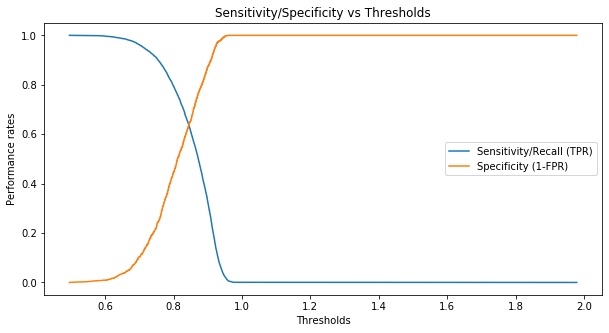

In [153]:
# Evaluate cutoff threshold for confusion matrix
bow_gbdt_est = 100
bow_gbdt_depth = 2
xg_clf = xgb.XGBClassifier(n_estimators=bow_gbdt_est, max_depth=bow_gbdt_depth,n_jobs=-1,learning_rate=0.1)
xg_clf.fit(final_x_train,y_train)
evaluate_threshold(clf=xg_clf,x_cv=final_x_cv,y_cv=y_cv.values)

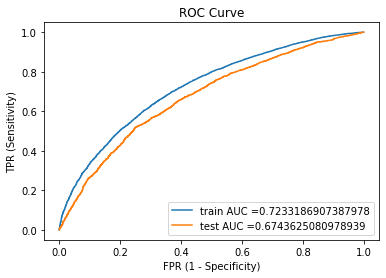

Confusion matrix 



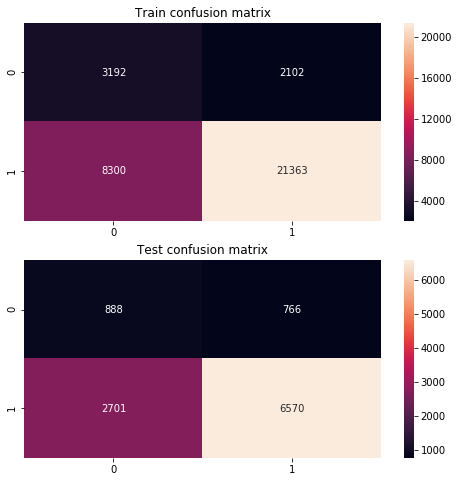

In [154]:
# Checking for model generalization 
bow_train_auc_gbdt,bow_test_auc_gbdt = model_gen_score(clf=xg_clf,x_train=final_x_train,y_train=y_train.values,x_test=final_x_test,\
                y_test=y_test.values,cutoff_val=0.8262)



### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [155]:
final_x_train = hstack((x_train_vec,tfidf_title_train,tfidf_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,tfidf_title_cv,tfidf_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,tfidf_title_test,tfidf_essay_test),format='csr')

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after TFIDF')

The Values for :  The Final Matrix dimension info after TFIDF

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 5812), ('Cross Validation count : ', 5812), ('Test count : ', 5812)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


In [117]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='gbdt',x_train = final_x_train,y_train=y_train.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv.values)

In [118]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

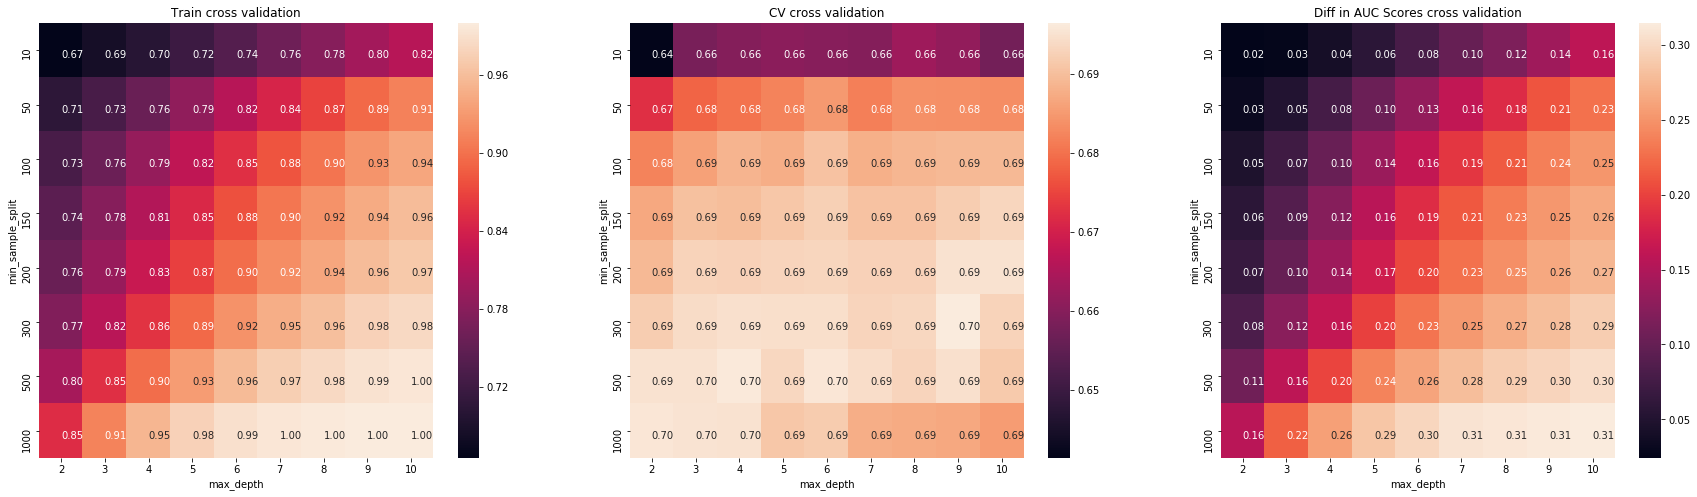

In [119]:
# calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+-----------------------+--------------------+
| Sensitivity/Recall (TPR) |  Specificity (1-FPR)  |  Threshold Value   |
+--------------------------+-----------------------+--------------------+
|           1.0            | 0.0007558578987150177 | 0.5060104131698608 |
|    0.9997303491977889    | 0.0007558578987150177 | 0.5299007139707866 |
|    0.9993258729944722    |  0.003023431594860182 | 0.5537910147717124 |
|    0.9986517459889444    | 0.0037792894935751997 | 0.5776813155726382 |
|    0.9973034919778886    | 0.0075585789871503994 | 0.601571616373564  |
|    0.9939328569502495    |  0.01814058956916098  | 0.6254619171744898 |
|    0.9885398409060266    |  0.03401360544217691  | 0.6493522179754156 |
|    0.9797761898341647    |  0.05517762660619807  | 0.6732425187763416 |
|    0.9677767291357692    |  0.09145880574452003  | 0.6971328195772672 |
|    0.9440474585411892    |  0.14814814814814814  | 0.7210231203781932 |
|    0.920048537144398     |  0.212396

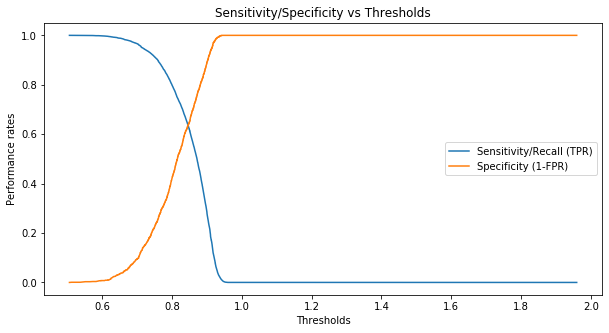

In [156]:
# Evaluate cutoff threshold for confusion matrix
tfidf_gbdt_est = 50
tfidf_gbdt_depth = 3
xg_clf = xgb.XGBClassifier(n_estimators=tfidf_gbdt_est, max_depth=tfidf_gbdt_depth,n_jobs=-1,learning_rate=0.1)
xg_clf.fit(final_x_train,y_train)
evaluate_threshold(clf=xg_clf,x_cv=final_x_cv,y_cv=y_cv.values)

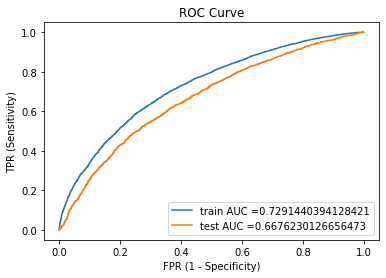

Confusion matrix 



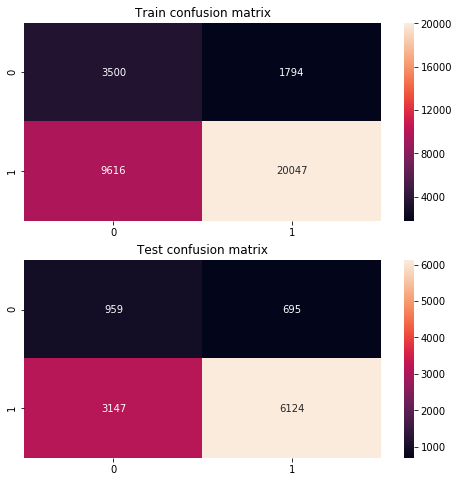

In [157]:
# Checking for model generalization 
tfidf_train_auc_gbdt,tfidf_test_auc_gbdt = model_gen_score(clf=xg_clf,x_train=final_x_train,y_train=y_train.values,x_test=final_x_test,\
                y_test=y_test.values,cutoff_val=0.84)



### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [135]:
# This time we have np.hstack because we are not dealing with the sparse matrices.

final_x_train = np.hstack((x_train_vec,avgw2v_title_train,avgw2v_essay_train))
final_x_cv = np.hstack((x_cv_vec,avgw2v_title_cv,avgw2v_essay_cv))
final_x_test = np.hstack((x_test_vec,avgw2v_title_test,avgw2v_essay_test))
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final matrix of AVGW2V')

The Values for :  The final matrix of AVGW2V

Row Values are :  [('Training count : ', 34957), ('Cross Validation count : ', 8740), ('Test count : ', 10925)]

Column Values are :  [('Training count : ', 613), ('Cross Validation count : ', 613), ('Test count : ', 613)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [137]:
# Working with only 20K data points as mentioned above
# So 20k of 50k is approx 20%, hence we will split the data 40% here for train,cv,test

# Conserving the distribution while sampling to smaller dataset.
# for training set
_,final_x_train,_,y_train_20k = train_test_split(final_x_train,y_train,test_size=.4,random_state=31,stratify=y_train)
# for cv set
_,final_x_cv,_,y_cv_20k = train_test_split(final_x_cv,y_cv,test_size=.4,random_state=31,stratify=y_cv)
# for test set
_,final_x_test,_,y_test_20k = train_test_split(final_x_test,y_test,test_size=.4,random_state=31,stratify=y_test)
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final matrix of AVGW2V')

The Values for :  The final matrix of AVGW2V

Row Values are :  [('Training count : ', 13983), ('Cross Validation count : ', 3496), ('Test count : ', 4370)]

Column Values are :  [('Training count : ', 613), ('Cross Validation count : ', 613), ('Test count : ', 613)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [134]:
y_train_20k.shape

(6992,)

In [132]:
final_x_train.shape

(13983, 613)

In [138]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='gbdt',x_train = final_x_train,y_train=y_train_20k.values,\
                                                       x_cv=final_x_cv,y_cv=y_cv_20k.values)


In [139]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

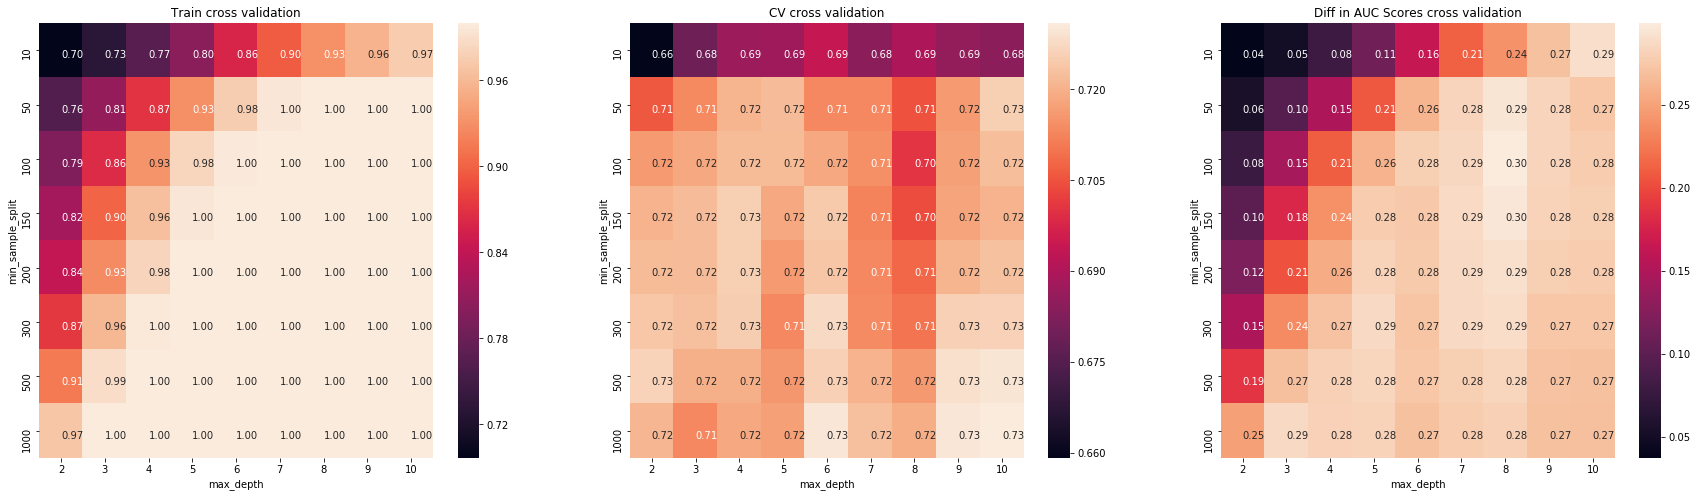

In [140]:
# calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+----------------------+--------------------+
| Sensitivity/Recall (TPR) | Specificity (1-FPR)  |  Threshold Value   |
+--------------------------+----------------------+--------------------+
|           1.0            | 0.001890359168241984 | 0.5167396068572998 |
|    0.9966295921806538    | 0.001890359168241984 | 0.5394351451020492 |
|    0.9966295921806538    | 0.001890359168241984 | 0.5621306833467985 |
|    0.9966295921806538    | 0.001890359168241984 | 0.584826221591548  |
|    0.9966295921806538    | 0.001890359168241984 | 0.6075217598362973 |
|     0.99561846983485     | 0.005671077504725952 | 0.6302172980810467 |
|    0.9929221435793731    | 0.03402646502835538  | 0.652912836325796  |
|    0.9871924502864846    | 0.056710775047258966 | 0.6756083745705455 |
|    0.979103471520054     |  0.0850661625708885  | 0.6983039128152948 |
|    0.967644084934277     |  0.1379962192816635  | 0.7209994510600441 |
|    0.9480957195820694    | 0.19281663516068048  |

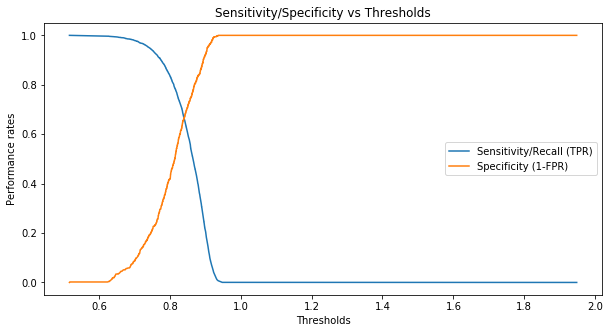

In [143]:
# Evaluate cutoff threshold for confusion matrix
avgw2v_gbdt_est = 50
avgw2v_gbdt_depth = 2
xg_clf = xgb.XGBClassifier(n_estimators=avgw2v_gbdt_est, max_depth=avgw2v_gbdt_depth,n_jobs=-1,learning_rate=0.1)
xg_clf.fit(final_x_train,y_train_20k.values)
evaluate_threshold(clf=xg_clf,x_cv=final_x_cv,y_cv=y_cv_20k.values)

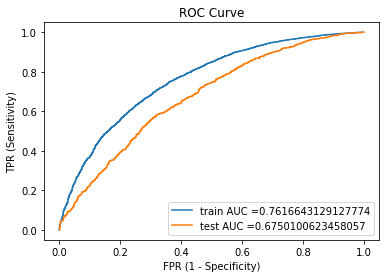

Confusion matrix 



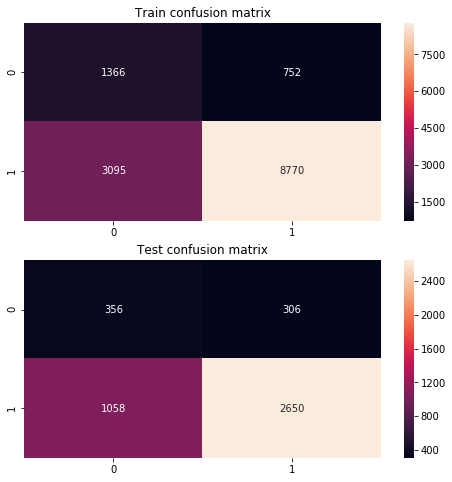

In [144]:
# model generalization score
# Checking for model generalization 
avgw2v_train_auc_gbdt,avgw2v_test_auc_gbdt = model_gen_score(clf=xg_clf,x_train=final_x_train,y_train=y_train_20k.values,x_test=final_x_test,\
                y_test=y_test_20k.values,cutoff_val=0.83)


### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [145]:
# This time we have np.hstack because we are not dealing with the sparse matrices.

final_x_train_t = np.hstack((x_train_vec,tfidfw2v_title_train,tfidfw2v_essay_train))
final_x_cv_t = np.hstack((x_cv_vec,tfidfw2v_title_cv,tfidfw2v_essay_cv))
final_x_test_t = np.hstack((x_test_vec,tfidfw2v_title_test,tfidfw2v_essay_test))
print_dimension_info([final_x_train,final_x_cv,final_x_test],_name='The final matrix of AVGW2V')

The Values for :  The final matrix of AVGW2V

Row Values are :  [('Training count : ', 13983), ('Cross Validation count : ', 3496), ('Test count : ', 4370)]

Column Values are :  [('Training count : ', 613), ('Cross Validation count : ', 613), ('Test count : ', 613)]

Type of matrices:  [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
****************************************************************************************************


In [146]:
# Working with only 20K data points as mentioned above
# So 20k of 109245 is approx 20%, hence we will split the data 20% here for train,cv,test
"""
Train Data shape :  (69916, 10) (69916,)
Cross Validation Data shape : (17480, 10) (17480,)
Test Data shape : (21849, 10) (21849,)

"""
# Conserving the distribution while sampling to smaller dataset.
# for training set
_,final_x_train_t,_,y_train_20k = train_test_split(final_x_train_t,y_train,test_size=.2,random_state=31,stratify=y_train)
# for cv set
_,final_x_cv_t,_,y_cv_20k = train_test_split(final_x_cv_t,y_cv,test_size=.2,random_state=31,stratify=y_cv)
# for test set
_,final_x_test_t,_,y_test_20k = train_test_split(final_x_test_t,y_test,test_size=.2,random_state=31,stratify=y_test)

In [147]:
# final_x_train and cv will be coo matrix and the indexing is not possible for that hence we are changing into csr matrix

auc_score,cordinates = _hypertuning(clf_type='gbdt',x_train = final_x_train_t,y_train=y_train_20k.values,\
                                                       x_cv=final_x_cv_t,y_cv=y_cv_20k.values)


In [148]:
# Extracting the cordinates for visualization and calling vizualization function.
x = [x[0] for x in cordinates]
y = [x[1] for x in cordinates]
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='plot')

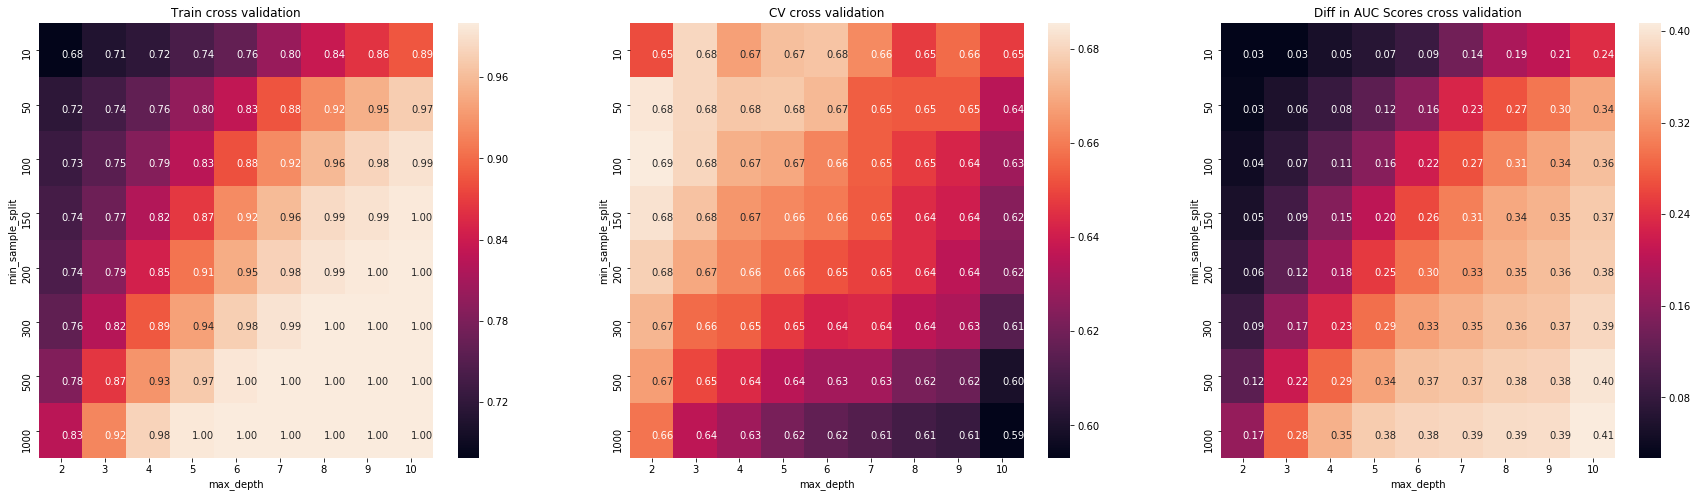

In [149]:
# calling vizualization function to analyse heatmap.
viz(AUC_score=auc_score,x_axis=x,y_axis=y,viz_type='heatmap')

+--------------------------+-----------------------+---------------------+
| Sensitivity/Recall (TPR) |  Specificity (1-FPR)  |   Threshold Value   |
+--------------------------+-----------------------+---------------------+
|           1.0            | 0.0037735849056603765 | 0.38345789909362793 |
|           1.0            | 0.0037735849056603765 | 0.41539582139567327 |
|    0.9979770734996628    |  0.007547169811320753 | 0.44733374369771856 |
|     0.99527983816588     |  0.007547169811320753 |  0.4792716659997639 |
|    0.9912339851652057    |  0.01132075471698113  |  0.5112095883018092 |
|    0.9912339851652057    |  0.01132075471698113  |  0.5431475106038546 |
|    0.9898853674983142    |  0.018867924528301883 |  0.5750854329058999 |
|    0.9824679703304113    |  0.04528301886792452  |  0.6070233552079451 |
|    0.968981793661497     |  0.06792452830188678  |  0.6389612775099904 |
|    0.9629130141604855    |  0.09056603773584904  |  0.6708991998120358 |
|    0.9433580579905597  

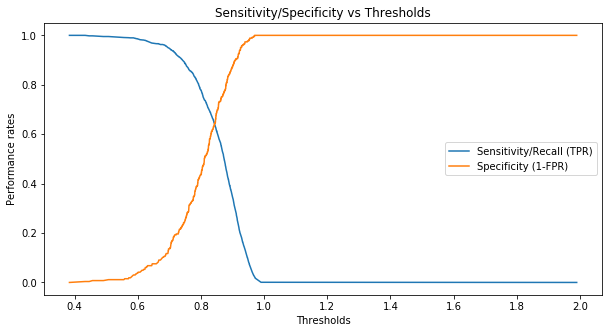

In [150]:
# Evaluate cutoff threshold for confusion matrix
tfidfw2v_gbdt_est = 100
tfidfw2v_gbdt_depth = 2
xg_clf = xgb.XGBClassifier(n_estimators=tfidfw2v_gbdt_est, max_depth=tfidfw2v_gbdt_depth,n_jobs=-1,learning_rate=0.1)
xg_clf.fit(final_x_train_t,y_train_20k.values)
evaluate_threshold(clf=xg_clf,x_cv=final_x_cv_t,y_cv=y_cv_20k.values)

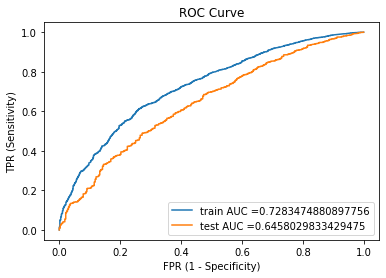

Confusion matrix 



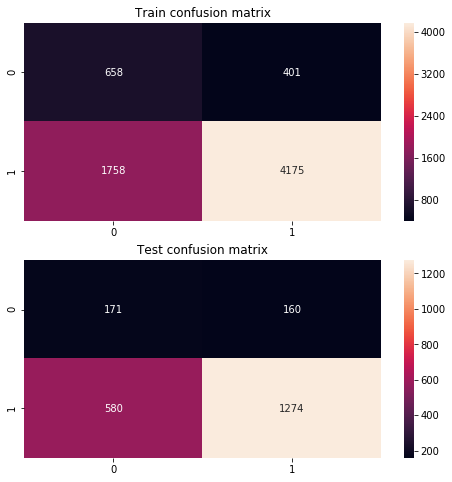

In [151]:
# model generalization score
# Checking for model generalization 
tfidfw2v_train_auc_gbdt,tfidfw2v_test_auc_gbdt = model_gen_score(clf=xg_clf,x_train=final_x_train_t,y_train=y_train_20k.values,x_test=final_x_test_t,\
                y_test=y_test_20k.values,cutoff_val=0.83)



In [ ]:
bow_test_auc_rf = 65.61
tfidf_test_auc_rf = 58.69
avgw2v_test_auc_rf = 67.29
tfidfw2v_test_auc_rf = 61.58
bow_test_auc_gbdt = 67.95
tfidf_test_auc_gbdt = 68.03
avgw2v_test_auc_gbdt = 67.5
tfidfw2v_test_auc_gbdt = 64.59

<h1>3. Conclusions</h1>

In [162]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Vectorizer','Model','No of estimators','Depth of base learners','Train AUC in % ','TEST AUC in %']

# For Random Forest 
x.add_row(['BOW','RF',bow_rf_est,bow_rf_depth,bow_train_auc_rf,bow_test_auc_rf])
x.add_row(['TFIDF','RF',tfidf_rf_est,tfidf_rf_depth,tfidf_train_auc_rf,tfidf_test_auc_rf])
x.add_row(['AVGW2V','RF',avgw2v_rf_est,avgw2v_rf_depth,avgw2v_train_auc_rf,avgw2v_test_auc_rf])
x.add_row(['TFIDF AVGW2V','RF',tfidfw2v_rf_est,tfidfw2v_rf_depth,tfidfw2v_train_auc_rf,tfidfw2v_test_auc_rf])

# For GBDT (XGBOOST)
x.add_row(['BOW','GBDT',bow_gbdt_est,bow_gbdt_depth,bow_train_auc_gbdt,bow_test_auc_gbdt])
x.add_row(['TFIDF','GBDT',tfidf_gbdt_est,tfidf_gbdt_depth,tfidf_train_auc_gbdt,tfidf_test_auc_gbdt])
x.add_row(['AVGW2V','GBDT',avgw2v_gbdt_est,avgw2v_gbdt_depth,avgw2v_train_auc_gbdt,avgw2v_test_auc_gbdt])
x.add_row(['TFIDF AVGW2V','GBDT',tfidfw2v_gbdt_est,tfidfw2v_gbdt_depth,tfidfw2v_train_auc_gbdt,tfidfw2v_test_auc_gbdt])


print(x)

+--------------+-------+------------------+------------------------+--------------------+--------------------+
|  Vectorizer  | Model | No of estimators | Depth of base learners |  Train AUC in %    |   TEST AUC in %    |
+--------------+-------+------------------+------------------------+--------------------+--------------------+
|     BOW      |   RF  |       100        |           3            | 0.7005433890469979 | 0.6491793786373679 |
|    TFIDF     |   RF  |       150        |           3            | 0.7133664710167397 | 0.6502300995276321 |
|    AVGW2V    |   RF  |        50        |           3            | 0.7173687813925785 | 0.6732544644877598 |
| TFIDF AVGW2V |   RF  |        50        |           3            | 0.6679160517171352 | 0.6261673716469958 |
|     BOW      |  GBDT |       100        |           2            | 0.7233186907387978 | 0.6743625080978939 |
|    TFIDF     |  GBDT |        50        |           3            | 0.7291440394128421 | 0.6676230126656473 |
|

<h1> Conclusion </h1>

* GBDT is a winner here for all models. </br>
* Surprisingly GBDT TFIDF model has achieve max AUC of 67.5%. </br>
* The Random Forest W2V models are genralising well over test data set than other models. </br>
* It's very easy to overfit these ensemble models when you have less data in your dataset espcially GBDT. 
* GBDT training time are way higher than Random Forest training Time especially when dealing with dense matrices.
